In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

# Data Exploration

## DataFrame Info

In [2]:
df = pd.read_csv("../raw_data/df_2010.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
df.head(20)

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,1117.699951,81.510002,17.440001,419.799988,25.678797,11866.900391,3.84100,20.040001,1517.300049,3.3880,1132.989990,2308.419922,1.442398,92.495003,1.0291
2010-01-05,1118.099976,81.769997,17.781000,420.350006,25.678797,11888.099609,3.75500,19.350000,1530.800049,3.3960,1136.520020,2308.709961,1.436596,91.584999,1.0337
2010-01-06,1135.900024,83.180000,18.163000,425.600006,25.697672,11944.500000,3.80800,19.160000,1552.199951,3.4775,1137.140015,2301.090088,1.440403,92.356003,1.0276
2010-01-07,1133.099976,82.660004,18.333000,422.950012,26.471237,11887.500000,3.82200,19.059999,1553.000000,3.4115,1141.689941,2300.050049,1.431803,93.389999,1.0336
2010-01-08,1138.199951,82.750000,18.458000,424.149994,28.225925,11953.799805,3.80800,18.129999,1564.599976,3.3880,1144.979980,2317.169922,1.441109,92.660004,1.0236
2010-01-11,1150.699951,82.519997,18.683001,430.950012,29.565531,11947.099609,3.81800,17.549999,1588.300049,3.4285,1146.979980,2312.409912,1.451126,92.092003,1.0167
2010-01-12,1128.900024,80.790001,18.243000,424.799988,29.037233,11820.200195,3.71900,18.250000,1573.900024,3.3375,1136.219971,2282.310059,1.447660,91.080002,1.0188
2010-01-13,1136.400024,79.650002,18.538000,423.950012,28.980627,11853.599609,3.78300,17.850000,1570.199951,3.3875,1145.680054,2307.899902,1.452391,91.432999,1.0176
2010-01-14,1142.599976,79.389999,18.643000,442.799988,29.414587,11804.400391,3.73400,17.629999,1600.099976,3.3760,1148.459961,2316.739990,1.449990,91.266998,1.0186


In [4]:
df.shape

(3435, 15)

In [5]:
df.describe()

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
count,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000,3435.000000
mean,1454.806380,71.346155,21.447358,1146.943144,15.281685,15186.948567,2.267132,18.710598,1184.777706,3.220051,2422.346137,6544.484914,1.205034,104.991460,0.955040
std,252.152289,22.610300,6.429655,657.141795,14.273102,2665.992630,0.744342,7.231073,314.122843,0.669174,999.068010,3731.243526,0.113720,15.323256,0.049925
min,1050.800049,-37.630001,11.735000,407.950012,1.615243,11092.500000,0.499000,9.140000,595.900024,1.939500,1022.580017,2091.790039,0.959619,75.739998,0.722800
25%,1246.300049,51.880001,16.584499,688.099976,3.936271,12922.074951,1.760000,13.630000,929.250000,2.696750,1576.674988,3269.489990,1.115505,96.679501,0.920900
50%,1344.500000,70.779999,19.143000,800.400024,8.337039,14942.400391,2.250000,16.889999,1045.800049,3.151500,2139.159912,5162.129883,1.178592,107.977997,0.958300
75%,1702.299988,92.094997,25.062000,1644.450012,24.853862,16364.049805,2.772000,21.750000,1472.949951,3.646250,2978.025024,8230.669922,1.307480,112.997002,0.987435
max,2051.500000,123.699997,48.584000,2985.399902,53.775055,22087.199219,4.234000,82.690002,1905.699951,4.929000,4796.560059,16057.440430,1.484406,150.175995,1.162700


In [6]:
df.dtypes

Adj Close gold         float64
Adj Close Brent        float64
Adj Close Silver       float64
Adj Close Palladium    float64
Adj Close Freight      float64
Adj Close CA           float64
Adj Close TNX          float64
Adj Close VIX          float64
Adj Close PLAT         float64
Adj Close Copper       float64
Adj Close SPX          float64
Adj Close NDQ          float64
Adj Close EUR/USD      float64
Adj Close USD/JPY      float64
Adj Close USD/CHF      float64
dtype: object

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3435 entries, 2010-01-04 to 2023-03-03
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Adj Close gold       3435 non-null   float64
 1   Adj Close Brent      3435 non-null   float64
 2   Adj Close Silver     3435 non-null   float64
 3   Adj Close Palladium  3435 non-null   float64
 4   Adj Close Freight    3435 non-null   float64
 5   Adj Close CA         3435 non-null   float64
 6   Adj Close TNX        3435 non-null   float64
 7   Adj Close VIX        3435 non-null   float64
 8   Adj Close PLAT       3435 non-null   float64
 9   Adj Close Copper     3435 non-null   float64
 10  Adj Close SPX        3435 non-null   float64
 11  Adj Close NDQ        3435 non-null   float64
 12  Adj Close EUR/USD    3435 non-null   float64
 13  Adj Close USD/JPY    3435 non-null   float64
 14  Adj Close USD/CHF    3435 non-null   float64
dtypes: float64(15)
memor

## Gold Price

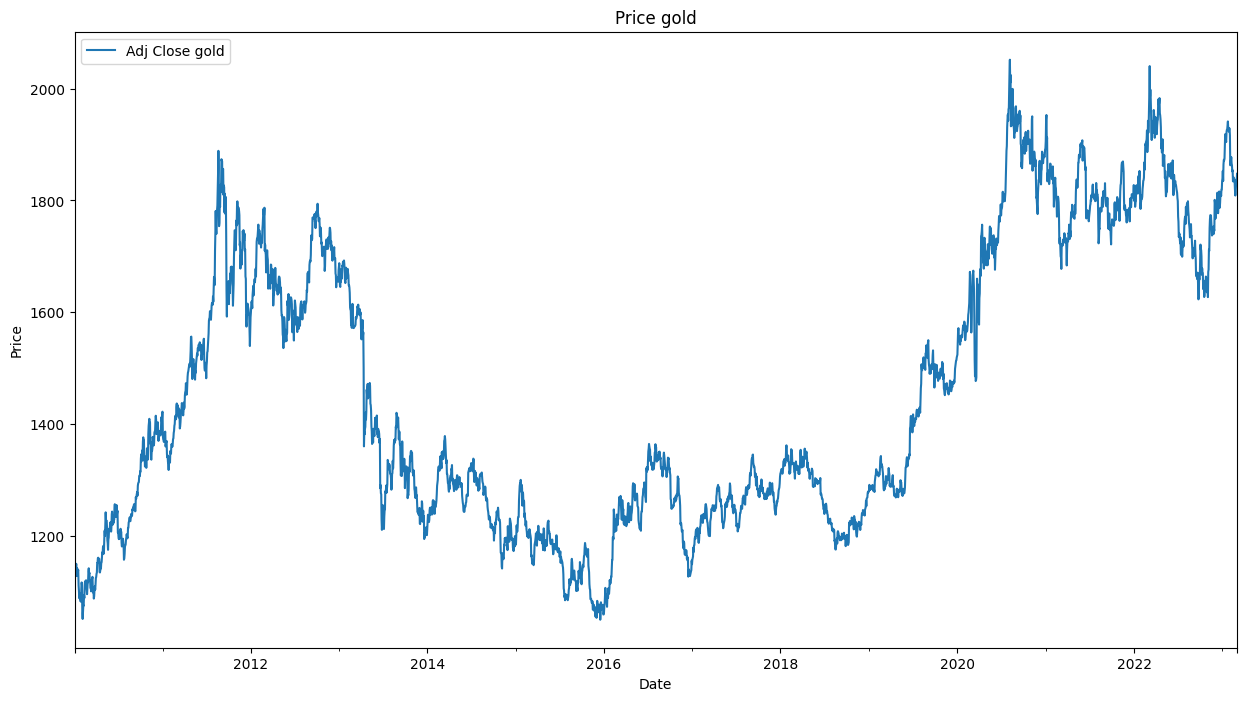

In [8]:
gold_price = df['Adj Close gold']
df_ax = gold_price.plot(title='Price gold',figsize=(15,8))
df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')

<AxesSubplot: >

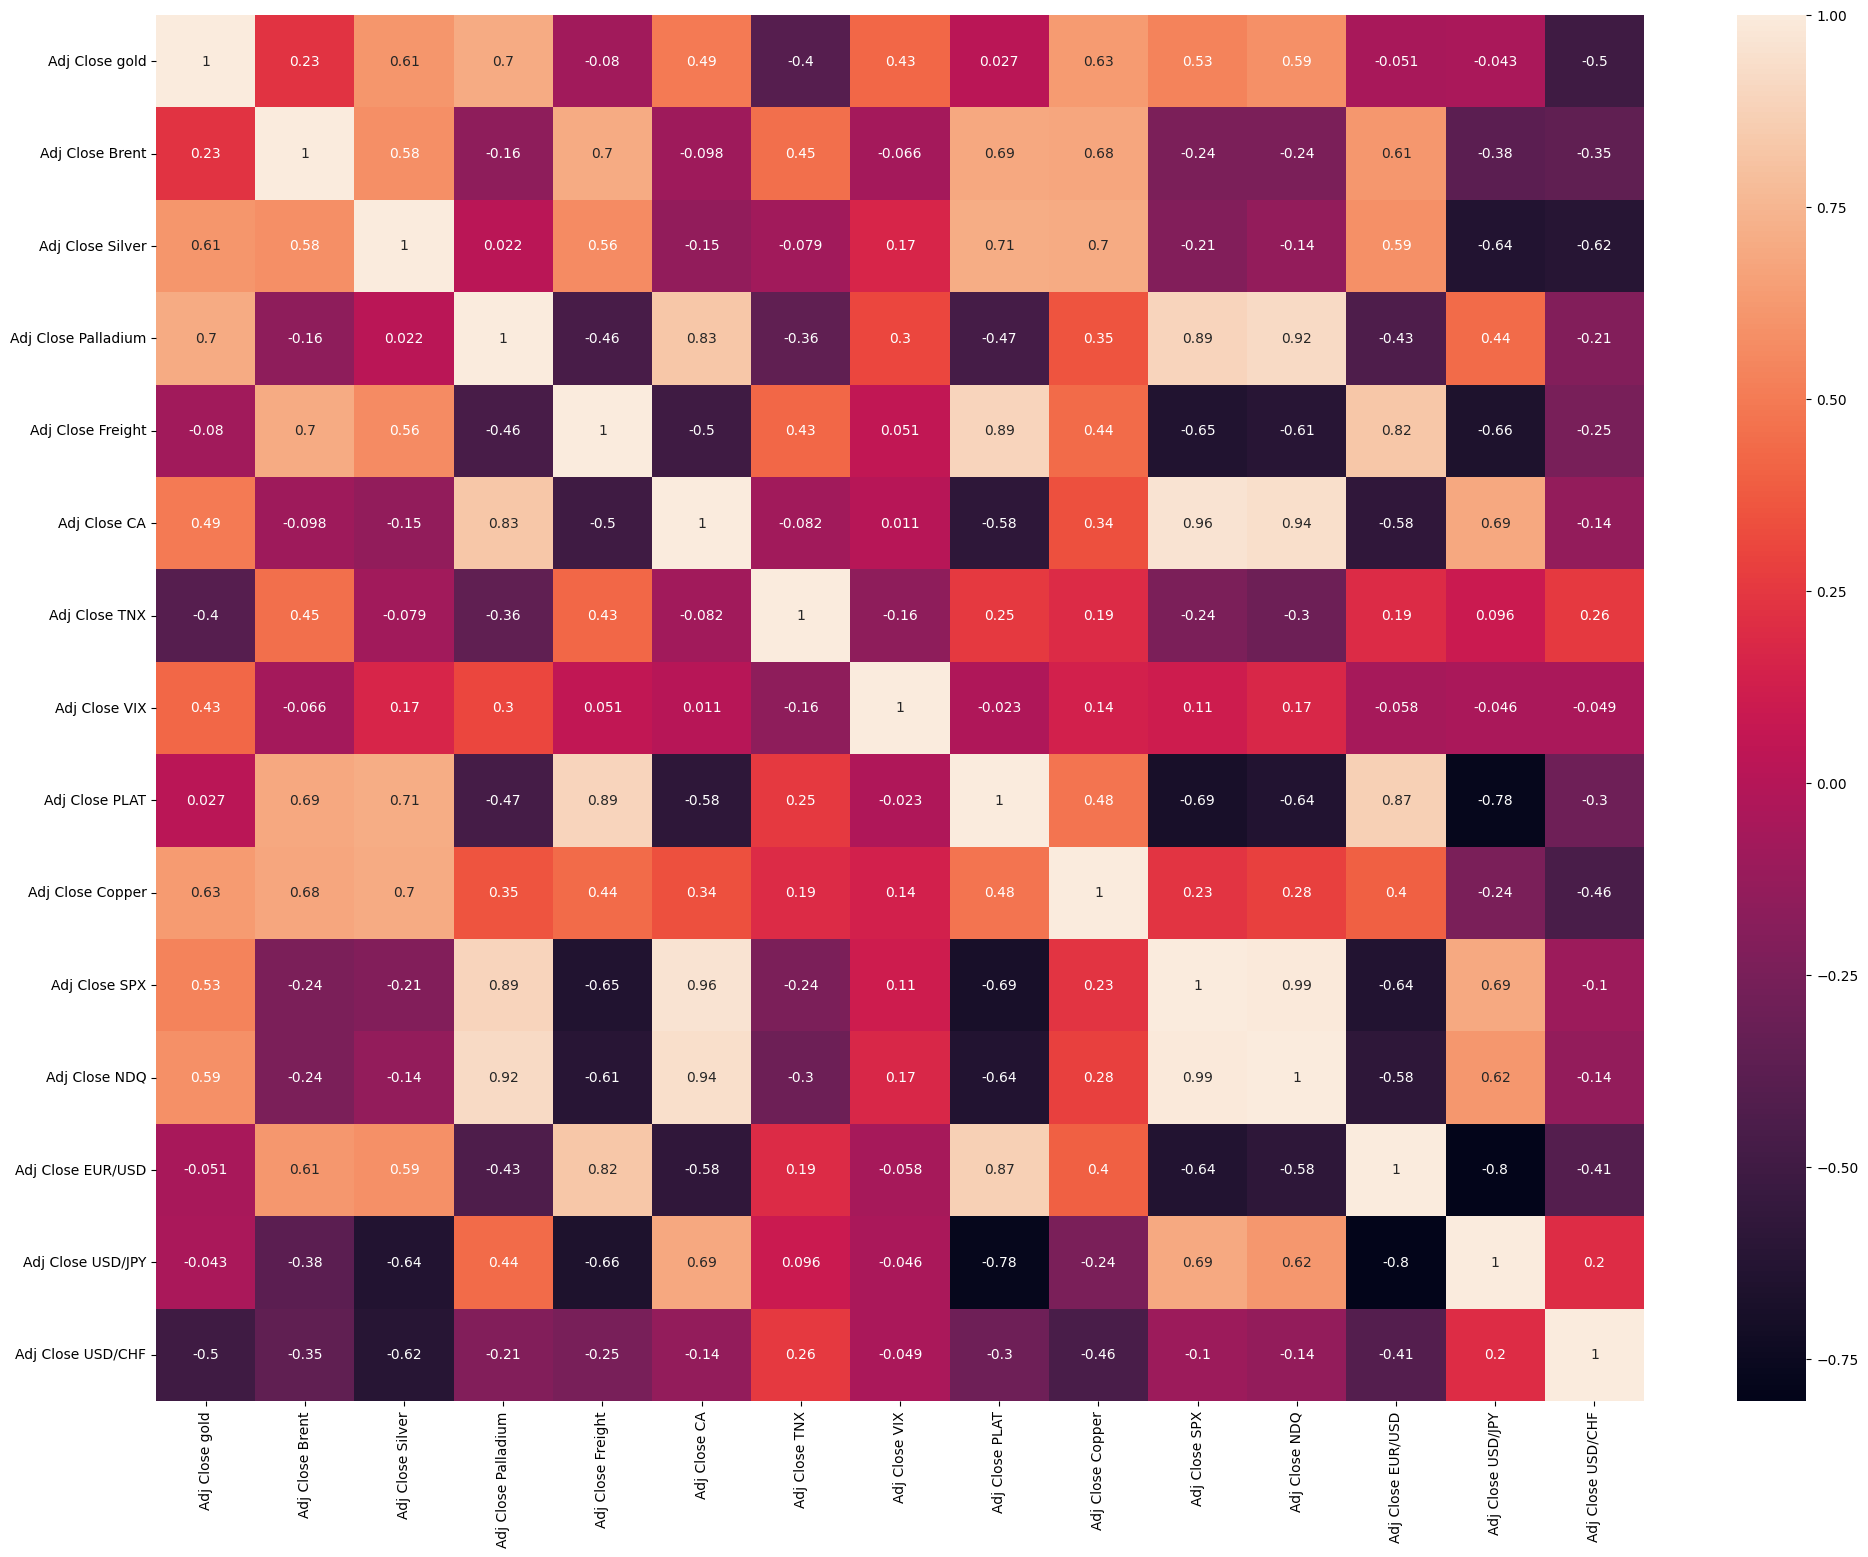

In [9]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df.corr(), annot=True)

In [10]:
corr_matrix=df.corr()
coef=corr_matrix["Adj Close gold"].sort_values(ascending=False)
coef

Adj Close gold         1.000000
Adj Close Palladium    0.703272
Adj Close Copper       0.627622
Adj Close Silver       0.606325
Adj Close NDQ          0.586428
Adj Close SPX          0.530475
Adj Close CA           0.492623
Adj Close VIX          0.425187
Adj Close Brent        0.229858
Adj Close PLAT         0.026933
Adj Close USD/JPY     -0.043476
Adj Close EUR/USD     -0.050628
Adj Close Freight     -0.079968
Adj Close TNX         -0.398327
Adj Close USD/CHF     -0.504117
Name: Adj Close gold, dtype: float64

# Features building

# Model Building

## Features and targets formatting

In [11]:
df

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,1117.699951,81.510002,17.440001,419.799988,25.678797,11866.900391,3.841,20.040001,1517.300049,3.3880,1132.989990,2308.419922,1.442398,92.495003,1.029100
2010-01-05,1118.099976,81.769997,17.781000,420.350006,25.678797,11888.099609,3.755,19.350000,1530.800049,3.3960,1136.520020,2308.709961,1.436596,91.584999,1.033700
2010-01-06,1135.900024,83.180000,18.163000,425.600006,25.697672,11944.500000,3.808,19.160000,1552.199951,3.4775,1137.140015,2301.090088,1.440403,92.356003,1.027600
2010-01-07,1133.099976,82.660004,18.333000,422.950012,26.471237,11887.500000,3.822,19.059999,1553.000000,3.4115,1141.689941,2300.050049,1.431803,93.389999,1.033600
2010-01-08,1138.199951,82.750000,18.458000,424.149994,28.225925,11953.799805,3.808,18.129999,1564.599976,3.3880,1144.979980,2317.169922,1.441109,92.660004,1.023600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-27,1817.000000,75.680000,20.670000,1410.500000,10.080000,20260.099609,3.922,20.950001,941.599976,4.0090,3982.239990,11466.980469,1.055476,136.395004,0.940030
2023-02-28,1828.900024,77.050003,20.961000,1404.400024,10.380000,20221.199219,3.916,20.700001,955.200012,4.0975,3970.149902,11455.540039,1.061121,136.317001,0.935600
2023-03-01,1837.699951,77.690002,20.959000,1421.699951,10.390000,20259.800781,3.994,20.580000,961.500000,4.1680,3951.389893,11379.480469,1.057731,136.348007,0.941868


In [12]:
df.shape

(3435, 15)

In [13]:
y=pd.DataFrame(df['Adj Close gold']).shift(-1)

In [14]:
X_train=df[:-800]
y_train=y[:-800]

In [15]:
X_train

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,1117.699951,81.510002,17.440001,419.799988,25.678797,11866.900391,3.841,20.040001,1517.300049,3.3880,1132.989990,2308.419922,1.442398,92.495003,1.02910
2010-01-05,1118.099976,81.769997,17.781000,420.350006,25.678797,11888.099609,3.755,19.350000,1530.800049,3.3960,1136.520020,2308.709961,1.436596,91.584999,1.03370
2010-01-06,1135.900024,83.180000,18.163000,425.600006,25.697672,11944.500000,3.808,19.160000,1552.199951,3.4775,1137.140015,2301.090088,1.440403,92.356003,1.02760
2010-01-07,1133.099976,82.660004,18.333000,422.950012,26.471237,11887.500000,3.822,19.059999,1553.000000,3.4115,1141.689941,2300.050049,1.431803,93.389999,1.03360
2010-01-08,1138.199951,82.750000,18.458000,424.149994,28.225925,11953.799805,3.808,18.129999,1564.599976,3.3880,1144.979980,2317.169922,1.441109,92.660004,1.02360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,1577.199951,50.110001,17.639999,2255.399902,2.929505,17379.800781,1.520,17.969999,968.000000,2.5130,3248.919922,9273.400391,1.108979,108.372002,0.96336
2020-02-04,1550.400024,49.610001,17.528000,2357.500000,3.029831,17512.699219,1.603,16.049999,963.400024,2.5475,3297.590088,9467.969727,1.106293,108.612000,0.96570
2020-02-05,1557.800049,50.750000,17.569000,2348.600098,3.103403,17651.599609,1.649,15.150000,984.400024,2.5790,3334.689941,9508.679688,1.104728,109.446999,0.96927


In [16]:
feature_columns=X_train.columns

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train_scaled=pd.DataFrame(columns=feature_columns, data=scaler.fit_transform(X_train), index=X_train.index)

In [19]:
display(X_train_scaled)
print('Shape of features : ', X_train_scaled.shape)
print('Shape of target : ', y_train.shape)

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,0.079842,0.630415,0.108082,0.006078,0.461343,0.116189,0.941781,0.280494,0.658399,0.539780,0.047525,0.028960,0.905675,0.335846,0.696294
2010-01-05,0.080320,0.633379,0.117848,0.006360,0.461343,0.119370,0.909056,0.262738,0.670273,0.542761,0.049044,0.028999,0.892647,0.317605,0.706751
2010-01-06,0.101563,0.649453,0.128787,0.009053,0.461705,0.127832,0.929224,0.257849,0.689094,0.573132,0.049311,0.027980,0.901197,0.333059,0.692885
2010-01-07,0.098222,0.643525,0.133656,0.007694,0.476535,0.119280,0.934551,0.255275,0.689798,0.548537,0.051270,0.027841,0.881886,0.353785,0.706524
2010-01-08,0.104308,0.644551,0.137236,0.008310,0.510176,0.129227,0.929224,0.231343,0.700000,0.539780,0.052686,0.030130,0.902781,0.339153,0.683792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.628237,0.272458,0.113809,0.947629,0.025197,0.943331,0.058600,0.227226,0.175286,0.213713,0.958307,0.960062,0.157024,0.654092,0.546851
2020-02-04,0.596253,0.266758,0.110602,1.000000,0.027120,0.963271,0.090183,0.177818,0.171240,0.226570,0.979257,0.986073,0.150991,0.658903,0.552171
2020-02-05,0.605084,0.279754,0.111776,0.995435,0.028531,0.984111,0.107686,0.154658,0.189710,0.238308,0.995226,0.991515,0.147478,0.675640,0.560286


Shape of features :  (2635, 15)
Shape of target :  (2635, 1)


In [20]:
y_train

,Adj Close gold
Date,
2010-01-04,1118.099976
2010-01-05,1135.900024
2010-01-06,1133.099976
2010-01-07,1138.199951
2010-01-08,1150.699951
...,...
2020-02-03,1550.400024
2020-02-04,1557.800049
2020-02-05,1565.099976


In [21]:
# Taking last 800 rows of data to be validation set and exlcuding the last row as NaN
X_val_scaled = pd.DataFrame(columns=feature_columns, data=scaler.fit_transform(df[-800:-1]), index=df[-800:-1].index)
y_val = y[-800:-1]


print('Shape of X_train_scaled : ', X_train_scaled.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of X_val_scaled : ', X_val_scaled.shape)
print('Shape of y_val : ', y_val.shape)

Shape of X_train_scaled :  (2635, 15)
Shape of y_train :  (2635, 1)
Shape of X_val_scaled :  (799, 15)
Shape of y_val :  (799, 1)


## Traint test split

In [22]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(X_train):
        XX_train, XX_test = X_train[:len(train_index)], X_train[len(train_index): (len(train_index)+len(test_index))]
        yy_train, yy_test = y_train[:len(train_index)].values.ravel(), y_train[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## Model building

In [23]:
# Save all soultion models
solution_models = {}

In [24]:
def validate_result(model, model_name):
    predicted = model.predict(X_val_scaled)
    RSME_score = np.sqrt(mean_squared_error(y_val, predicted))
    print('RMSE: ', RSME_score)
    R2_score = r2_score(y_val, predicted)
    print('R2 score: ', R2_score)

In [25]:
def trading_result(model, model_name):
    y_pred = model.predict(X_val_scaled)
    result_pd=y_val.copy()
    result_pd['pred']=y_pred
    result_pd['signal']=''
    result=[]
    for index, row in result_pd.iterrows():
        if row['Adj Close gold']>row['pred']:
            result.append(-1)
            row['signal']=-1
        else:
            result.append(1)
            row['signal']=-1
            
    pnl=0
    pnl_history=[0]
    for i in range(len(result)-1):
        pnl+=(result_pd['Adj Close gold'][i+1]-result_pd['Adj Close gold'][i])*result[i]*(100000)
        pnl_history.append(pnl)
        
    plt.plot(pnl_history)
    
    plt.ylabel('PnL')
    plt.title(model_name + ' PnL')
    plt.legend(loc='upper right')
    plt.show()

### 3.3.2  Default Model: Decision Tree Regressor

In [26]:
dt = DecisionTreeRegressor(random_state=0)
default_dt=dt.fit(X_train_scaled, y_train)

In [27]:
validate_result(default_dt,'DecisionTree');

RMSE:  298.88685832357606
R2 score:  -9.521333355010647


In [28]:
predicted = default_dt.predict(X_val_scaled)

In [29]:
predicted

array([1191.47497559, 1195.59997559, 1195.59997559, 1191.47497559,
       1191.47497559, 1229.30004883, 1233.59997559, 1231.59997559,
       1244.65002441, 1268.        , 1311.19995117, 1303.30004883,
       1322.69995117, 1322.69995117, 1147.19995117, 1222.        ,
       1322.69995117, 1322.69995117, 1342.09997559, 1326.09997559,
       1352.90002441, 1324.5       , 1322.69995117, 1192.59997559,
       1122.19995117, 1091.90002441, 1114.19995117, 1091.5       ,
       1091.5       , 1091.5       , 1147.19995117, 1296.40002441,
       1285.80004883, 1278.30004883, 1251.        , 1251.        ,
       1218.59997559, 1204.30004883, 1276.40002441, 1285.80004883,
       1343.30004883, 1286.        , 1286.        , 1396.5       ,
       1396.5       , 1396.5       , 1464.59997559, 1423.40002441,
       1423.40002441, 1386.80004883, 1397.30004883, 1352.90002441,
       1392.59997559, 1392.59997559, 1423.40002441, 1423.40002441,
       1423.40002441, 1397.30004883, 1345.69995117, 1397.30004

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


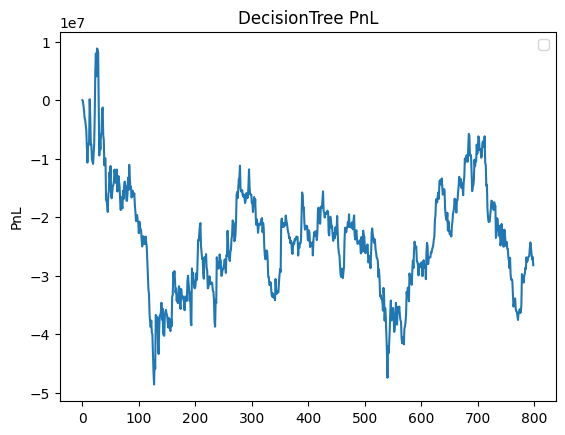

In [30]:
trading_result(default_dt,'DecisionTree');

###  Support Vector Regressor

In [31]:
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train_scaled,y_train.values.ravel())

In [32]:
validate_result(linear_svr_clf_feat,'Support Vector Regressor');

RMSE:  255.5550469402816
R2 score:  -6.691766028055555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


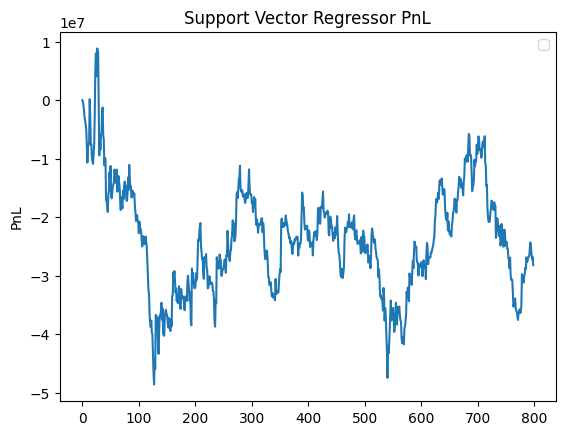

In [33]:
trading_result(linear_svr_clf_feat,'Support Vector Regressor');

### Random Forest

In [34]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train_scaled,y_train)

/tmp/ipykernel_20869/2784160208.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_clf_feat = rf_cl.fit(X_train_scaled,y_train)


In [35]:
validate_result(random_forest_clf_feat,'Random Forest with All feat')

RMSE:  283.1514379222551
R2 score:  -8.442667200814041


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


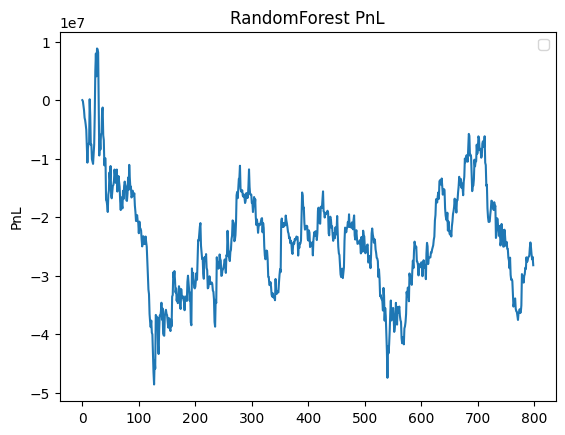

In [36]:
trading_result(random_forest_clf_feat,'RandomForest');

Hyper parameter Tuning

In this I will tune 3 parameters of Random forest which are n_estimators,max_features,max_depth

In [37]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

In [38]:
grid_search_RF_feat = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

In [ ]:
grid_search_RF_feat.fit(X_train_scaled, y_train)

In [ ]:
print(grid_search_RF_feat.best_params_)

In [ ]:
validate_result(grid_search_RF_feat,'RandomForest GS')

In [ ]:
trading_result(grid_search_RF_feat,'RandomForest');

### Solution Model : Lasso and Ridge¶

In [39]:
lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_feat = lasso_clf.fit(X_train_scaled,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

/home/cypdupmad/.pyenv/versions/taxifare-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE:  282.1334456910961
R2 score:  -8.374892286611612


In [40]:
ridge_clf = RidgeCV(gcv_mode='auto')
ridge_clf_feat = ridge_clf.fit(X_train_scaled,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

RMSE:  272.277558895977
R2 score:  -7.7313387380971825


In [41]:
X_train_scaled.head()

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,0.079842,0.630415,0.108082,0.006078,0.461343,0.116189,0.941781,0.280494,0.658399,0.539780,0.047525,0.028960,0.905675,0.335846,0.696294
2010-01-05,0.080320,0.633379,0.117848,0.006360,0.461343,0.119370,0.909056,0.262738,0.670273,0.542761,0.049044,0.028999,0.892647,0.317605,0.706751
2010-01-06,0.101563,0.649453,0.128787,0.009053,0.461705,0.127832,0.929224,0.257849,0.689094,0.573132,0.049311,0.027980,0.901197,0.333059,0.692885
2010-01-07,0.098222,0.643525,0.133656,0.007694,0.476535,0.119280,0.934551,0.255275,0.689798,0.548537,0.051270,0.027841,0.881886,0.353785,0.706524
2010-01-08,0.104308,0.644551,0.137236,0.008310,0.510176,0.129227,0.929224,0.231343,0.700000,0.539780,0.052686,0.030130,0.902781,0.339153,0.683792


## Gold Price Prediction by using LSTM

In [44]:
X_train_scaled.iloc[:,0:1].values.shape

(2635, 1)

In [45]:
X_train_scaled.head(15)

,Adj Close gold,Adj Close Brent,Adj Close Silver,Adj Close Palladium,Adj Close Freight,Adj Close CA,Adj Close TNX,Adj Close VIX,Adj Close PLAT,Adj Close Copper,Adj Close SPX,Adj Close NDQ,Adj Close EUR/USD,Adj Close USD/JPY,Adj Close USD/CHF
Date,,,,,,,,,,,,,,,
2010-01-04,0.079842,0.630415,0.108082,0.006078,0.461343,0.116189,0.941781,0.280494,0.658399,0.539780,0.047525,0.028960,0.905675,0.335846,0.696294
2010-01-05,0.080320,0.633379,0.117848,0.006360,0.461343,0.119370,0.909056,0.262738,0.670273,0.542761,0.049044,0.028999,0.892647,0.317605,0.706751
2010-01-06,0.101563,0.649453,0.128787,0.009053,0.461705,0.127832,0.929224,0.257849,0.689094,0.573132,0.049311,0.027980,0.901197,0.333059,0.692885
2010-01-07,0.098222,0.643525,0.133656,0.007694,0.476535,0.119280,0.934551,0.255275,0.689798,0.548537,0.051270,0.027841,0.881886,0.353785,0.706524
2010-01-08,0.104308,0.644551,0.137236,0.008310,0.510176,0.129227,0.929224,0.231343,0.700000,0.539780,0.052686,0.030130,0.902781,0.339153,0.683792
2010-01-11,0.119227,0.641929,0.143679,0.011798,0.535859,0.128222,0.933029,0.216418,0.720844,0.554872,0.053547,0.029493,0.925273,0.327768,0.668106
2010-01-12,0.093209,0.622207,0.131079,0.008643,0.525730,0.109182,0.895358,0.234431,0.708179,0.520961,0.048915,0.025469,0.917490,0.307483,0.672880
2010-01-13,0.102160,0.609211,0.139527,0.008207,0.524645,0.114193,0.919711,0.224138,0.704925,0.539594,0.052987,0.028890,0.928112,0.314558,0.670152
2010-01-14,0.109560,0.606247,0.142534,0.017876,0.532965,0.106812,0.901065,0.218477,0.731223,0.535308,0.054184,0.030072,0.922722,0.311231,0.672425


In [46]:
# Create the training data set 
n_observation=10
XX_train = []
yy_train = []

for i in range(n_observation, len(X_train_scaled)-1):
    XX_train.append(X_train_scaled.iloc[i-n_observation:i,:].values)
    yy_train.append(X_train_scaled.iloc[i:i+1,0:1].values)
    
XX_train = np.array(XX_train)
yy_train = np.array(yy_train)

print(XX_train.shape)
print(yy_train.shape)

(2624, 10, 15)
(2624, 1, 1)


In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (XX_train.shape[1], 15)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(XX_train, yy_train, batch_size = 18, epochs = 100)

2023-03-11 16:43:04.513727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 16:43:05.077168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-11 16:43:05.077322: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-11 16:43:05.166515: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-11 16:43:06.762878: W tensorflow/stream_executor/platform/de

Epoch 1/100
146/146 [==============================] - 8s 28ms/step - loss: 0.0056
Epoch 2/100
146/146 [==============================] - 4s 27ms/step - loss: 0.0013
Epoch 3/100
146/146 [==============================] - 4s 26ms/step - loss: 0.0011
Epoch 4/100
146/146 [==============================] - 4s 28ms/step - loss: 0.0011
Epoch 5/100
146/146 [==============================] - 3s 23ms/step - loss: 9.4921e-04
Epoch 6/100
146/146 [==============================] - 5s 32ms/step - loss: 8.4095e-04
Epoch 7/100
146/146 [==============================] - 3s 23ms/step - loss: 9.2211e-04
Epoch 8/100
146/146 [==============================] - 3s 22ms/step - loss: 8.0315e-04
Epoch 9/100
146/146 [==============================] - 3s 23ms/step - loss: 7.7308e-04
Epoch 10/100
146/146 [==============================] - 4s 26ms/step - loss: 5.6746e-04
Epoch 11/100
146/146 [==============================] - 3s 24ms/step - loss: 6.3072e-04
Epoch 12/100
146/146 [==============================] - 4

146/146 [==============================] - 3s 21ms/step - loss: 2.8879e-04
Epoch 95/100
146/146 [==============================] - 3s 21ms/step - loss: 3.1897e-04
Epoch 96/100
146/146 [==============================] - 3s 22ms/step - loss: 3.0387e-04
Epoch 97/100
146/146 [==============================] - 3s 21ms/step - loss: 3.0770e-04
Epoch 98/100
146/146 [==============================] - 3s 21ms/step - loss: 3.0759e-04
Epoch 99/100
146/146 [==============================] - 3s 21ms/step - loss: 3.0072e-04
Epoch 100/100
146/146 [==============================] - 3s 21ms/step - loss: 2.9849e-04


In [48]:
n_observation=10
XX_val = []
yy_val = []
yy_test=[]

for i in range(n_observation, len(X_val_scaled)-1):
    XX_val.append(X_val_scaled.iloc[i-n_observation:i,:].values)
    yy_val.append(X_val_scaled.iloc[i:i+1,0:1].values)
    yy_test.append(df[-800:-1].iloc[i:i+1,0:1].values)

XX_val = np.array(XX_val)
yy_val = np.array(yy_val)
yy_test = np.array(yy_test)
print(XX_val.shape)
print(yy_val.shape)
print(yy_test.shape)

(788, 10, 15)
(788, 1, 1)
(788, 1, 1)


In [49]:
pred = model.predict(XX_val)
new_pred=np.column_stack((pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred))
predictions = scaler.inverse_transform(new_pred)
gold_pred=predictions[:,0]
y_test=yy_test.reshape(len(yy_test),1)

25/25 [==============================] - 1s 11ms/step


In [50]:
rmse = np.sqrt(np.mean(((gold_pred - y_test) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 128.85822600385873


In [51]:
def model_result(model, model_name):
    pred = model.predict(XX_val)
    new_pred=np.column_stack((pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred,pred))
    predictions = scaler.inverse_transform(new_pred)
    gold_pred=predictions[:,0]
    y_test=yy_test.reshape(len(yy_test),1)
    RSME_score = np.sqrt(mean_squared_error(y_test, gold_pred))
    print('RMSE: ', RSME_score)
    R2_score = r2_score(y_test, gold_pred)
    print('R2 score: ', R2_score)
    print(np.sqrt(np.mean(((gold_pred - y_test) ** 2))))

In [52]:
model_result(model,'LSTM')

25/25 [==============================] - 0s 10ms/step
RMSE:  32.47846375448424
R2 score:  0.8697446268782533
128.85822600385873


##  Gold Price Prediction by using RNN

In [53]:
# create a model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
    
my_rnn_model = Sequential()
my_rnn_model.add(SimpleRNN(32, return_sequences=True))
#my_rnn_model.add(SimpleRNN(32, return_sequences=True))
#my_rnn_model.add(SimpleRNN(32, return_sequences=True))
my_rnn_model.add(SimpleRNN(32))
my_rnn_model.add(Dense(1)) # The time step of the output

my_rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
my_rnn_model.fit(XX_train, yy_train, batch_size = 18, epochs = 100)

Epoch 1/100
146/146 [==============================] - 3s 9ms/step - loss: 0.0073
Epoch 2/100
146/146 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 3/100
146/146 [==============================] - 1s 9ms/step - loss: 9.6201e-04
Epoch 4/100
146/146 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 5/100
146/146 [==============================] - 1s 9ms/step - loss: 7.4309e-04
Epoch 6/100
146/146 [==============================] - 1s 9ms/step - loss: 6.5848e-04
Epoch 7/100
146/146 [==============================] - 1s 9ms/step - loss: 6.0235e-04
Epoch 8/100
146/146 [==============================] - 1s 10ms/step - loss: 6.9788e-04
Epoch 9/100
146/146 [==============================] - 1s 10ms/step - loss: 5.3773e-04
Epoch 10/100
146/146 [==============================] - 1s 9ms/step - loss: 7.0111e-04
Epoch 11/100
146/146 [==============================] - 1s 9ms/step - loss: 5.1668e-04
Epoch 12/100
146/146 [==============================] - 1s 9ms

146/146 [==============================] - 1s 9ms/step - loss: 3.5495e-04
Epoch 96/100
146/146 [==============================] - 1s 9ms/step - loss: 3.6310e-04
Epoch 97/100
146/146 [==============================] - 1s 9ms/step - loss: 4.2443e-04
Epoch 98/100
146/146 [==============================] - 1s 9ms/step - loss: 3.2741e-04
Epoch 99/100
146/146 [==============================] - 1s 9ms/step - loss: 3.2496e-04
Epoch 100/100
146/146 [==============================] - 1s 9ms/step - loss: 3.5148e-04


In [55]:
model_result(my_rnn_model,'RNN')

25/25 [==============================] - 0s 5ms/step
RMSE:  29.945123382231067
R2 score:  0.8892721407775898
128.21829150689408


## LSTM bis

In [56]:
# create a model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM

    
# The LSTM architecture
my_LSTM_model = Sequential()
my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(XX_train.shape[1], 15), activation='tanh'))
#my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
#my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
my_LSTM_model.add(LSTM(units=50, activation='tanh'))
my_LSTM_model.add(Dense(units=1))

my_LSTM_model.compile(optimizer = "adam", loss = "mean_squared_error")

my_LSTM_model.fit(XX_train, yy_train, batch_size = 18, epochs = 100)


Epoch 1/100
146/146 [==============================] - 6s 18ms/step - loss: 0.0106
Epoch 2/100
146/146 [==============================] - 3s 18ms/step - loss: 0.0016
Epoch 3/100
146/146 [==============================] - 3s 18ms/step - loss: 0.0014
Epoch 4/100
146/146 [==============================] - 3s 18ms/step - loss: 0.0012
Epoch 5/100
146/146 [==============================] - 3s 18ms/step - loss: 0.0011
Epoch 6/100
146/146 [==============================] - 3s 18ms/step - loss: 0.0010
Epoch 7/100
146/146 [==============================] - 3s 18ms/step - loss: 9.0421e-04
Epoch 8/100
146/146 [==============================] - 3s 18ms/step - loss: 0.0010
Epoch 9/100
146/146 [==============================] - 3s 18ms/step - loss: 8.1750e-04
Epoch 10/100
146/146 [==============================] - 3s 18ms/step - loss: 6.8518e-04
Epoch 11/100
146/146 [==============================] - 3s 18ms/step - loss: 6.7321e-04
Epoch 12/100
146/146 [==============================] - 3s 19ms/step 

146/146 [==============================] - 3s 20ms/step - loss: 2.7637e-04
Epoch 95/100
146/146 [==============================] - 3s 20ms/step - loss: 2.9542e-04
Epoch 96/100
146/146 [==============================] - 3s 20ms/step - loss: 2.7420e-04
Epoch 97/100
146/146 [==============================] - 3s 20ms/step - loss: 2.8473e-04
Epoch 98/100
146/146 [==============================] - 3s 19ms/step - loss: 2.8537e-04
Epoch 99/100
146/146 [==============================] - 3s 20ms/step - loss: 2.9343e-04
Epoch 100/100
146/146 [==============================] - 3s 20ms/step - loss: 2.7048e-04


In [57]:
model_result(my_LSTM_model,'LSTM bis')

25/25 [==============================] - 2s 14ms/step
RMSE:  38.16792156825909
R2 score:  0.8201121993508352
132.71166138286645


## LSTM with regu

In [58]:
# create a model
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout

    
# The LSTM architecture
my_LSTM_model_regu = Sequential()
my_LSTM_model_regu.add(LSTM(units=50, return_sequences=True, input_shape=(XX_train.shape[1], 15), activation='tanh'))
#my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
#my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
my_LSTM_model_regu.add(LSTM(units=50, activation='tanh'))
my_LSTM_model_regu.add(Dropout(0.2))
my_LSTM_model_regu.add(Dense(units=1))

my_LSTM_model_regu.compile(optimizer = "adam", loss = "mean_squared_error")

my_LSTM_model_regu.fit(XX_train, yy_train, batch_size = 18, epochs = 100)


Epoch 1/100
146/146 [==============================] - 8s 21ms/step - loss: 0.0124
Epoch 2/100
146/146 [==============================] - 3s 19ms/step - loss: 0.0032
Epoch 3/100
146/146 [==============================] - 3s 20ms/step - loss: 0.0030
Epoch 4/100
146/146 [==============================] - 3s 21ms/step - loss: 0.0025
Epoch 5/100
146/146 [==============================] - 3s 19ms/step - loss: 0.0021
Epoch 6/100
146/146 [==============================] - 3s 19ms/step - loss: 0.0022
Epoch 7/100
146/146 [==============================] - 3s 20ms/step - loss: 0.0019
Epoch 8/100
146/146 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 9/100
146/146 [==============================] - 3s 21ms/step - loss: 0.0018
Epoch 10/100
146/146 [==============================] - 4s 25ms/step - loss: 0.0015
Epoch 11/100
146/146 [==============================] - 4s 26ms/step - loss: 0.0016
Epoch 12/100
146/146 [==============================] - 3s 23ms/step - loss: 0.0015
E

146/146 [==============================] - 3s 19ms/step - loss: 5.3999e-04
Epoch 96/100
146/146 [==============================] - 3s 20ms/step - loss: 5.7349e-04
Epoch 97/100
146/146 [==============================] - 3s 19ms/step - loss: 6.0740e-04
Epoch 98/100
146/146 [==============================] - 3s 20ms/step - loss: 5.6482e-04
Epoch 99/100
146/146 [==============================] - 3s 20ms/step - loss: 6.0878e-04
Epoch 100/100
146/146 [==============================] - 3s 19ms/step - loss: 5.8451e-04


In [59]:
model_result(my_LSTM_model_regu,'LSTM regu')

25/25 [==============================] - 1s 9ms/step
RMSE:  30.58056092117589
R2 score:  0.8845229757001043
130.07686651138764


In [ ]:
import pickle
file = open("lstm_try.pkl", "wb")
pickle.dump(my_LSTM_model, file)
file.close()

In [ ]:
file2 = open("scaler.pkl", "wb")
pickle.dump(scaler, file2)
file2.close()

In [ ]:
file = open("DecisionTreeRegressor.pkl", "wb")
pickle.dump(default_dt, file)
file.close()

In [43]:
import pickle
file = open("Lasso.pkl", "wb")
pickle.dump(lasso_clf_feat, file)
file.close()